# 统计Stats

## 离散概率分布

### 二项分布binom

例8-1：羊痘是一种传染性极强的绵羊病毒，发病率为0.001，某农户家里共有5000只绵羊，那么问该羊群中感染这种病毒的数目数为1只、2只、3只、4只、5只的概率？不超过5只的概率？
分析该问题可知，发病的概率p=0.001，不发病的概率为0.999，该随机变量X服从二项分布，可以利用stats提供的表示二项分布的类对象binom完成。

In [37]:
import numpy as np
from scipy import stats
#第1步，定义随机变量：5000只羊，感染病毒的数目
n=5000 #绵羊总数 
p=0.001 #发病的概率
#发病的绵羊的数目，1-5
X=np.arange(0,6)
print(X)
#第2步，求对应分布的概率:概率质量函数 (PMF)
#pmf函数需要传递三个参数，分别是随机变量、变量总数、事件发生的概率
#pmf函数返回一个列表，列表中每个元素值表示随机变量中对应值的概率
binom = stats.binom.pmf(X,n,p)
print(binom)
#2只羊患病的概率
stats.binom.pmf(2,n,p)


[0 1 2 3 4 5]
[0.00672111 0.0336392  0.08416534 0.14035982 0.17552003 0.17555517]


0.08416534323955638

<IPython.core.display.Javascript object>


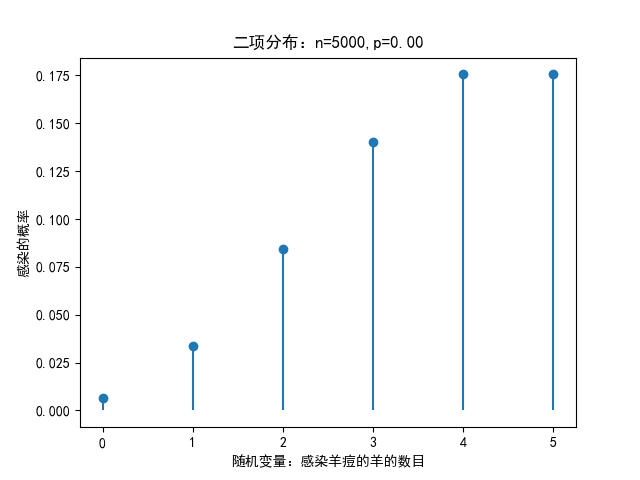

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
# 中文显示
plt.rcParams['font.sans-serif']=['SimHei'] 

plt.plot(X, binom, marker='o',linestyle='None')
plt.vlines(X, 0, binom)
#x轴文本
plt.xlabel('随机变量：感染羊痘的羊的数目')
#y轴文本
plt.ylabel('感染的概率')
#标题
plt.title('二项分布：n=%i,p=%.2f' % (n,p))
#显示图形
plt.show()

In [7]:
# 不超过5只羊患病的概率
sum(binom)

0.6159606694699798

In [10]:
#累计分布函数
k=5 #感染数不超过5只的概率
stats.binom.cdf(k,n,p)

0.61596066946998

## 连续概率分布

### 正态分布（Normal Distribution）

<img src= '14.png' width = "50%">

例8-2：生成指定分布的随机数
norm.rvs通过loc和scale参数可以指定随机变量的偏移和缩放参数，对应的是正态分布的期望和标准差，默认生成服从标准正态分布的随机数，如下所示：
data = stats.norm.rvs(size=1000)

数据的维度: (1000,)
数据的均值： 0.042074443345136214
数据的标准差： 1.0207485502638898


<IPython.core.display.Javascript object>


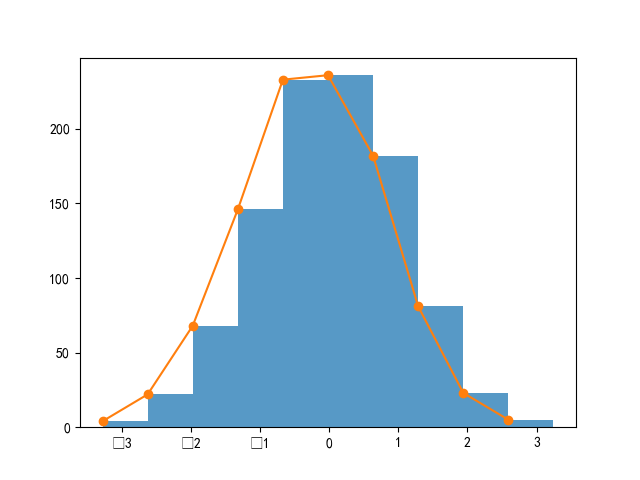

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

rv = stats.norm.rvs(size=1000)

print("数据的维度:",rv.shape)
print("数据的均值：",rv.mean(axis=0))
print("数据的标准差：",rv.std())

# 可视化
fig,ax = plt.subplots()
 
n,bins_num,pat = ax.hist(rv,bins=10,alpha=0.75)
# 折线图帮助看出数据的走向
ax.plot(bins_num[:10],n,marker = 'o')

plt.show()

In [39]:
#生成1000个均值为5，标准差为2的数据
rv = stats.norm.rvs(loc=5,scale=2,size=1000)
#rv

例8-3：生成指定范围内的正态分布
正态函数的概率密度函数可以用stats.norm类对象中的pdf(x,loc=0,scale=1)函数生成，loc代表均值，scale表示标准差，缺省情况下，该函数生成标准正态分布的概率密度函数。例如生成一个范围在[-10,10]之间的标准正态分布

In [40]:
import numpy as np
from scipy import stats
# 随机变量，-10~10，间隔为0.001
X=np.arange(-10,10,0.001)

# 标准正态分布，均值为0，标准差为1
mu=0
sigma=1
# 调用pdf函数生成一个标准正态分布
norm = stats.norm.pdf(X,mu,sigma)
print(len(X))
print(norm.shape)
print(norm)
X0=0.5
p = stats.norm.pdf(X0,mu,sigma) 
print("随机变量取0.5时，概率为：",p)

20000
(20000,)
[7.69459863e-23 7.77192674e-23 7.85002413e-23 ... 7.92889836e-23
 7.85002413e-23 7.77192674e-23]
随机变量取0.5时，概率为： 0.3520653267642995


例8-4：计算积累分布函数
连续随机变量的累积分布函数(CDF)是概率密度函数的积分，它给出了在小于或等于给定截止值的随机变量的概率，即P(X≤x)。针对上述例子，若要计算区间[-2,2]的概率，可以使用累计分布函数stats.norm.cdf，注意P()= P()-

In [23]:
X1=2
p1 = stats.norm.cdf(X1,mu,sigma)
print("X<=2时的概率为：",p1)

X2=-2
p2 = stats.norm.cdf(X2,mu,sigma)
print("X<=-2时的概率为：",p2)
print("X 取值范围为[-2,2]时的概率为:",p1-p2)

X<=2时的概率为： 0.9772498680518208
X<=-2时的概率为： 0.022750131948179195
X 取值范围为[-2,2]时的概率为: 0.9544997361036416


<IPython.core.display.Javascript object>


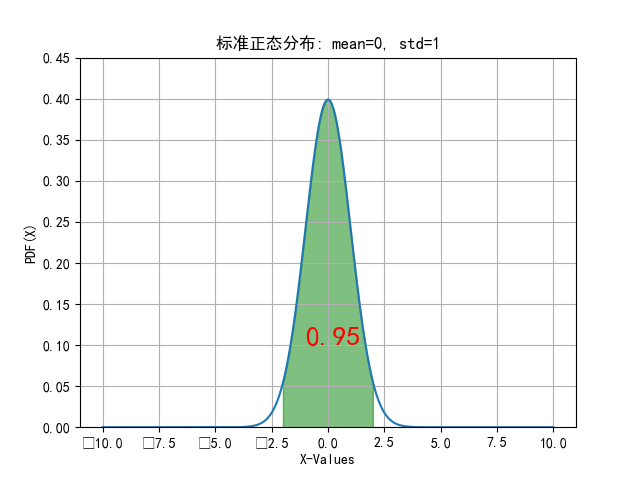

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
 
# 概率密度曲线
ax.plot(X,norm)
ax.set_title("标准正态分布: mean=0, std=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
ax.grid(True)

# 累计分布函数
# 注意这里的子集必须和X生成方式一致
px=np.arange(X2,X1,0.01)
pnorm = stats.norm.pdf(px,mu,sigma)

ax.set_ylim(0,0.45)
# 填充
ax.fill_between(px,pnorm,alpha=0.5, color='green')

# 标记X在[-2,2]之间的概率值
ax.text(-1,0.1,round(p1-p2,2), fontsize=20,color='red')

plt.show()

## 统计检验

统计检验亦称“假设检验（Hypothesis Testing）”，是根据抽样结果，在一定可靠性程度上对一个或多个总体分布的原假设作出拒绝还是不拒绝（予以接受）结论的过程。
scipy.stats提供了许多统计检验的方法，包括T检验、卡方检验、柯尔莫哥罗夫-斯米尔诺夫检验等。

In [27]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
#导入IRIS数据集
iris = load_iris()
iris=pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_legth','petal_width'])
print(iris)

     sepal_length  sepal_width  petal_legth  petal_width
0             5.1          3.5          1.4          0.2
1             4.9          3.0          1.4          0.2
2             4.7          3.2          1.3          0.2
3             4.6          3.1          1.5          0.2
4             5.0          3.6          1.4          0.2
..            ...          ...          ...          ...
145           6.7          3.0          5.2          2.3
146           6.3          2.5          5.0          1.9
147           6.5          3.0          5.2          2.0
148           6.2          3.4          5.4          2.3
149           5.9          3.0          5.1          1.8

[150 rows x 4 columns]


In [30]:
# 一个总体均值的z检验
np.mean(iris['petal_legth'])
'''
原假设：鸢尾花花瓣平均长度是4.2
备择假设：鸢尾花花瓣平均长度不是4.2

'''

import statsmodels.stats.weightstats
z, pval = statsmodels.stats.weightstats.ztest(iris['petal_legth'], value=4.2)
print(z,pval)


'''
P=0.002 <5%, 拒绝原假设，接受备则假设。
'''

-3.066548320028344 0.0021654580512200875


'\nP=0.002 <5%, 拒绝原假设，接受备则假设。\n'

In [31]:
# 一个总体均值的t检验
import scipy.stats
t, pval = scipy.stats.ttest_1samp(iris['petal_legth'], popmean=4.0)
print(t, pval)

'''
P=0.0959 > 5%, 接受原假设，即花瓣长度为4.0。 
'''

-1.67896989467615 0.09525380636130043


'\nP=0.0959 > 5%, 接受原假设，即花瓣长度为4.0。 \n'

In [32]:
#双样本t检验
#取两个样本
iris_1 = iris[iris.petal_legth >= 2]
iris_2 = iris[iris.petal_legth < 2]
print(np.mean(iris_1['petal_legth']))
print(np.mean(iris_2['petal_legth']))

'''
H0: 两种鸢尾花花瓣长度一样
H1: 两种鸢尾花花瓣长度不一样

'''

import scipy.stats
t, pval = scipy.stats.ttest_ind(iris_1['petal_legth'],iris_2['petal_legth'])
print(t,pval)

'''
p<0.05,拒绝H0，认为两种鸢尾花花瓣长度不一样
'''

4.906000000000001
1.4620000000000002
29.130840211367364 3.6233785751774946e-63


'\np<0.05,拒绝H0，认为两种鸢尾花花瓣长度不一样\n'

例8-5：数据集seeds_dataset.csv包括三种不同品种小麦籽粒几何性状的测定数据。检验种子数据集seeds_dataset.csv中2号小麦种子的面积均值，通过零假设，假定均值为18.0，确定检验水平：0.05。

scipy.stats包提供的ttest_1samp()方法实现了单样本t检验（One-Samples T Test）

In [33]:
# t检验
import numpy as np
from scipy import stats

# 读取小麦种子数据
file = open(r"./seeds_dataset.csv","r",encoding='utf-8')
seeds_data = file.read()

# 把读入的种子数据由字符串数据转换成二维列表
rows = seeds_data.split('\n')
final_data = []
for row in rows:
    split_list = row.split(',')
    final_data.append(split_list)

# 确定观测样本：2号种子的面积
area = []
for row in final_data[0:len(final_data)-1]:
    if row[7]=="2":
        area.append(float(row[0]))
       
# list转换成ndarray      
area = np.array(area)
# 调用stats.ttest_1samp()方法完成t检验
res = stats.ttest_1samp(a = area, popmean = 18.0)
res

Ttest_1sampResult(statistic=1.9429261635909159, pvalue=0.05610626698442667)

pvalue值为0.056106266984426667，大于0.05，说明总体均值和零假设中的期望值没有显著性差异，可以接受2号种子的面积均值为18.0的假设；statistic为正，说明样本均值大于总体均值。

例8-6：通过种子的面积来检验小麦种子数据集seeds_dataset.csv中1号种子和2号小麦种子是否来自同一个品种，检验水平：0.05。

scipy.stats包提供了两个解决两个独立样本均值的t检验方法，分别是ttest_ind()方法和ttest_ind_from_stats()方法。第一个方法要求输入原始样本数据，第二个方法要求输入样本的描述统计量（均值，标准差，样本数）等。

In [34]:
import numpy as np
from scipy import stats

# 读取小麦种子数据
file = open(r"seeds_dataset.csv", "r", encoding='utf-8')
seeds_data = file.read()

# 把读入的种子数据由字符串数据转换成二维列表
rows = seeds_data.split('\n')
final_data = []
for row in rows:
    split_list = row.split(',')
    final_data.append(split_list)

# 确定观测样本：1号种子和2号种子的面积
area1 = []
area2 = []
for row in final_data[0:len(final_data)-1]:
    if row[7] == "1":
        area1.append(float(row[0]))
    if row[7] == "2":
        area2.append(float(row[1]))
# list转换成ndarray
area1 = np.array(area1)
area2 = np.array(area2)
# 调用ttest_ind
res = stats.ttest_ind(area1, area2)
print(res)

Ttest_indResult(statistic=-11.054435150111685, pvalue=9.711516263224944e-21)


结果可知，pvalue值远远小于0.05，说明两个样本的总体均值不相等，即1号种子和2号种子来自不同的小麦品种。统计量为负，说明1号种子的均值大于2号小麦种子的均值。

该问题也可以通过第二个方法ttest_ind_from_stats()解决，需要注意的是Scipy.stats库函数要求输入的样本标准差是总体标准差的无偏统计量，也就是我们常说的“修正样本标准差”，原始样本的标准差和修正样本标准差S的关系为：
<img src= './15.png' width = "20%">

In [35]:
import numpy as np
from scipy import stats

# 读取小麦种子数据
file = open(r"seeds_dataset.csv", "r", encoding='utf-8')
seeds_data = file.read()

# 把读入的种子数据由字符串数据转换成二维列表
rows = seeds_data.split('\n')
final_data = []
for row in rows:
    split_list = row.split(',')
    final_data.append(split_list)

# 确定观测样本：1号种子和2号种子的面积
area1 = []
area2 = []
for row in final_data[0:len(final_data)-1]:
    if row[7] == "1":
        area1.append(float(row[0]))
    if row[7] == "2":
        area2.append(float(row[1]))
        
# list转换成ndarray
area1 = np.array(area1)
area2 = np.array(area2)

# 计算两个样本的统计量：均值、方差、样本量
area1_m = area1.mean()
area1_s = area1.std()

area2_m = area2.mean()
area2_s = area2.std()

num1 = len(area1)
num2 = len(area2)

# 计算修正样本标准差
modified_area1_s = np.sqrt(np.float32(num1)/np.float32(num1-1)) * area1_s
modified_area2_s = np.sqrt(np.float32(num2)/np.float32(num2-1)) * area2_s

res = stats.ttest_ind_from_stats(mean1=area1_m,std1=modified_area1_s,
nobs1=num1, mean2=area2_m, std2=modified_area2_s, nobs2=num2)
res

Ttest_indResult(statistic=-11.05443561239945, pvalue=9.71148973289968e-21)

# 线性代数-linalg

## 解线性方程组

<img src= './1.png' width = "30%">

<img src= '2.png' width = "30%">

In [5]:
import numpy as np
from scipy import linalg

a = np.array([[2,5,7],[1,6,4],[2,1,3]])
b = np.array([11,9,6])
x = linalg.solve(a,b)
print(x)

if np.dot(a, x).all() == b.all() :
    print("结果一致")
else:print("结果不一致")

[2.08333333 0.95833333 0.29166667]
结果一致


## 最小二乘法

最小二乘法（又称最小平方法）是一种数学优化技术，线性最小二乘问题出现在应用数学的许多分支中，它通过最小化误差的平方和寻找数据的最佳函数匹配。利用最小二乘法可以简便地求得未知的数据，并使得这些求得的数据与实际数据之间误差的平方和为最小。scipy的线性代数模块linalg提供了lsqst方法计算方程Ax = b的最小二乘解，该方法是通过计算能够使2-范数|b-Ax|最小化的向量x来求解等式Ax = b。

<img src= '9.png' width = "60%">

<img src= '10.png' width = "50%">
<img src= 'base2.gif' width = "50%">

例8-9：假设有x= [1.2, 2, 3.5, 4.5, 5, 7, 8], y = [0.4, 1.2, 1.7, 2.1, 3.5, 6.0, 8.8]，假设数据满足y=a+bx2，求满足条件的参数[a,b]。

<img src= '3.png' width = "30%">

[[ 1.    1.44]
 [ 1.    4.  ]
 [ 1.   12.25]
 [ 1.   20.25]
 [ 1.   25.  ]
 [ 1.   49.  ]
 [ 1.   64.  ]]
(7, 2)
[0.18270914 0.12743569]


<IPython.core.display.Javascript object>


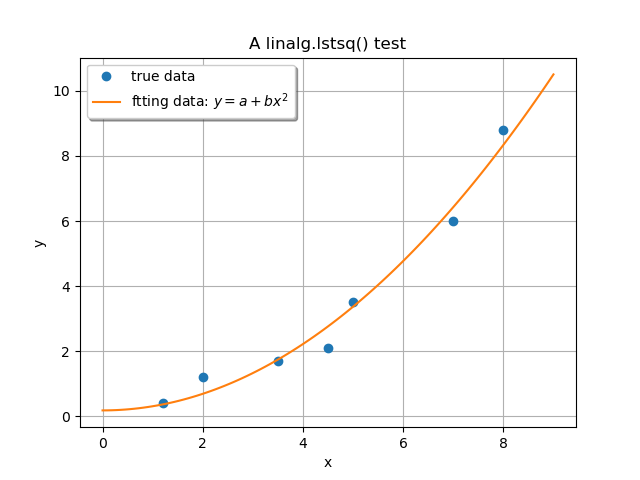

In [9]:
%matplotlib notebook
import numpy as np
from scipy import linalg

import matplotlib.pyplot as plt

x = np.array([1.2, 2, 3.5, 4.5, 5, 7, 8])
y = np.array([0.4, 1.2, 1.7, 2.1, 3.5, 6.0, 8.8])
# 构造矩阵A
A=x[:,np.newaxis]**[0,2]
print(A)

print(A.shape)
# 调用方法
p, res, rnk, s = linalg.lstsq(A, y)
print(p)
# 绘制真实数据
plt.plot(x, y, 'o', label='true data')
# 绘制拟合数据
xx = np.linspace(0, 9, 101)
yy = p[0] +p[1]*xx**2
plt.plot(xx, yy, label='ftting data: $y = a + bx^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid()
plt.title("A linalg.lstsq() test")
plt.show()

例8-10：数据集meat.csv描述的是某猪场10头投育肥猪4个酮体形状的数据资料，试利用y=a0+a1x1+a2x2+a3x3进行瘦肉量y对眼肌面积x1、腿肉量x2、腰肉量x3的多元回归分析。

<img src= '4.png' width = "30%">

In [12]:
import pandas as pd
import numpy as np
from scipy import linalg

# 读取csv文件数据
meat_info = pd.read_csv("meat.csv")

# 观测样本瘦肉量数据y
y=meat_info['y']
print(y)
# 观测样本数据x：眼肌面积x1、腿肉量x2、腰肉量x3
x1=np.array(meat_info['x1'])
x2=np.array(meat_info['x2'])
x3=np.array(meat_info['x3'])

# 构造矩阵A
A=np.hstack((np.ones((x1.shape[-1],1)),x1[:,np.newaxis], x2[:,np.newaxis],x3[:,np.newaxis]))
print(A)
# 调用lstsq方法
C, resid, rank, s = linalg.lstsq(A, y)
C

# y=1.59699271 - 0.01304989 x1 + 2.23365216 x2 + 1.43027783 x3

0    15.02
1    12.62
2    14.86
3    13.98
4    15.91
5    12.47
6    15.80
7    14.32
8    13.76
9    15.18
Name: y, dtype: float64
[[ 1.   23.73  5.49  1.21]
 [ 1.   22.34  4.32  1.35]
 [ 1.   28.84  5.04  1.92]
 [ 1.   27.67  4.72  1.49]
 [ 1.   20.83  5.35  1.56]
 [ 1.   22.27  4.27  1.5 ]
 [ 1.   22.57  5.25  1.85]
 [ 1.   28.01  4.62  1.51]
 [ 1.   24.79  4.42  1.51]
 [ 1.   28.96  5.3   1.66]]


array([ 1.59699271, -0.01304989,  2.23365216,  1.43027783])

## 特征值和特征向量

求取矩阵的特征值、特征向量是线性代数中的常见计算，一般可以通过以下关系来找到方阵（A）的特征值（λ）和特征向量（v）,scipy.linalg包中提供的eig函数可用于计算特征值和特征向量。

<img src= '5.png' width = "10%">

<img src= '6.png' width = "50%">

In [13]:
A = np.array([[2,5,7],[1,6,4],[2,1,3]])
# 求解
l, v = linalg.eig(A)
print('特征值')
print (l)
print('特征向量')
print (v)

特征值
[ 9.33118512+0.j -0.9734245 +0.j  2.64223938+0.j]
特征向量
[[-0.72467834 -0.86807111  0.28141916]
 [-0.60768209 -0.14743118 -0.76844713]
 [-0.3249058   0.47404283  0.57471059]]


In [14]:
#注意：如果A不是一个（N,N）的方阵，则程序会报错，如下所示：

A = np.array([[2,5,7,8],[1,6,4,9],[2,1,3,1]])
# 求解
l, v = linalg.eig(A)

print('特征值')
print (l)

print('特征向量')
print (v)

ValueError: expected square matrix

## 奇异值分解-SVD

奇异值分解（Singular Value Decomposition，SVD）是一种矩阵分解（Matrix Decomposition）的方法，但是和特征分解不同，SVD不要求待分解的矩阵必须是方阵。对于m*n的矩阵A，它的SVD定义为：

<img src= '7.png' width = "30%">

其中U是一个的矩阵，被称为左奇异向量；是一个的矩阵，除了主对角线上的元素以外全为0，主对角线上的每个元素都称为矩阵的奇异值；是一个的矩阵，被称为右奇异向量。U和V都是酉矩阵。

<img src= '8.png' width = "50%">

In [15]:
A = np.array([[2,5,7,8],[1,6,4,9],[2,1,3,1]])
print("矩阵A的维度为：",A.shape)
u, s, v = linalg.svd(A)
print("u:",u)
print("矩阵u的维度为：",u.shape)
print("s:",s) 
print("矩阵s的维度为：",s.shape)
print("v:",v)
print("矩阵v的维度为：",v.shape)

矩阵A的维度为： (3, 4)
u: [[ 0.70891698  0.38695368 -0.58966394]
 [ 0.68264569 -0.58661387  0.43575111]
 [ 0.17728955  0.71144291  0.6800128 ]]
矩阵u的维度为： (3, 3)
s: [16.69166052  3.42877586  0.7949623 ]
矩阵s的维度为： (3,)
v: [[ 0.14708295  0.46836254  0.49275327  0.71846875]
 [ 0.46960763 -0.25474745  0.72811672 -0.4294397 ]
 [ 0.77544409  0.43549203 -0.43348567 -0.14533865]
 [ 0.39562828 -0.72531852 -0.19781414  0.52750438]]
矩阵v的维度为： (4, 4)


# 拟合与优化-optimize

优化是指在某些约束条件下，求解目标函数最优解的过程。机器学习、人工智能中的绝大部分问题都会涉及到求解优化问题。SciPy的optimize模块提供了许多常用的数值优化算法，主要包括最小化(或最大化)目标函数的函数、非线性问题求解器(支持局部和全局优化算法)、线性规划、最小二乘最小化、曲线拟合和多元方程系统求解等。

## 非线性方程（组）求解

例8-13：求解方程组x*cos(x) = 4的解。

In [16]:
from scipy.optimize import fsolve
import numpy as np

'''
计算非线性方程：
    x*cos(x) = 4

'''
# 定义func(x)函数
# 转换为  x*cos(x) -4 = 0的形式
def func(x):
    return x * np.cos(x) - 4
           
# x初始解为1结果
x_init = 1
root = fsolve(func, x_init)
print("该方程的解为：",root)

# 验证解root是不是方程的解
res = np.isclose(func(root), 0.0)
res

该方程的解为： [-10.60897682]


array([ True])

例8-14：求解方程组x0*cos(x1) = 4， x1*x0 - x1 = 5的解。

In [17]:
'''
计算非线性方程组：
    x0*cos(x1) = 4
    x1*x0 - x1 = 5
    

'''
# 定义func(x)函数
def func(x):
    
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]

# x0,x1初始解为1，10的结果
x_init = [1,1]
root = fsolve(func, x_init)
print("方程组的解：",root)

# 验证
np.isclose(func(root), [0.0, 0.0])

方程组的解： [6.50409711 0.90841421]


array([ True,  True])

## 最小二乘拟合

最小二乘法拟合函数leastsq()拟合数据的步骤：

1）定义拟合函数;

2）定义误差函数error = y-f(x,p) ;

3）定义拟合的初始值x0;

4）调用leastsq(error, x0, args=()) 返回拟合值。

例8-15：利用leastsq()函数拟合1号小麦种子的面积和籽粒宽度之间的关系。

a,b,c的值为： [0.00186578 0.07852985 1.73285648]
[0.00186578 0.07852985 1.73285648]


<IPython.core.display.Javascript object>


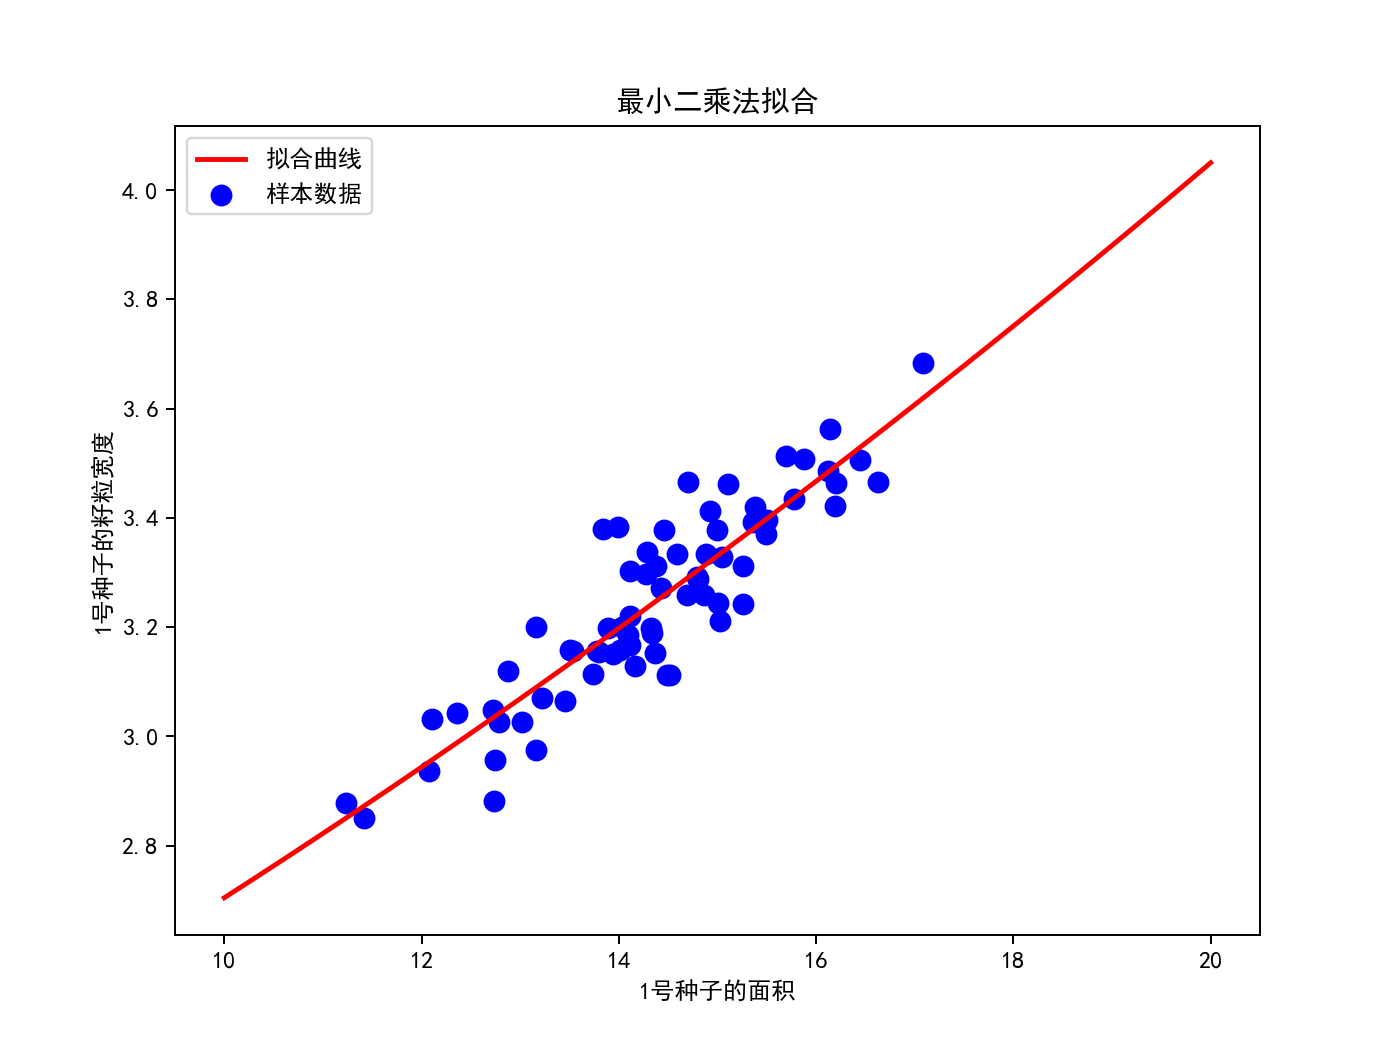

In [42]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize,stats


plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取小麦种子数据
file = open(r"seeds_dataset.csv","r",encoding='utf-8')
seeds_data = file.read()

# 把读入的种子数据由字符串数据转换成二维列表
rows = seeds_data.split('\n')
final_data = []
for row in rows:
    split_list = row.split(',')
    final_data.append(split_list)

# 1号种子的面积和宽度
area = []
width = []
for row in final_data[0:len(final_data)]:
    if row[7]=="1":
        area.append(float(row[0]))
        width.append(float(row[4]))
    else:
        break
        
# list转换成ndarray      
area = np.array(area)
width = np.array(width)



# 定义拟合函数
def func(x0,x):
    a,b,c=x0
    return a*x**2+b*x+c

# 定义误差函数
def error_func(x0,x,y):
    return np.array(y - func(x0,x))

# 初始的参数a,b,c的值
x0=np.array([0.0,0.0,0.0])

# 调用leastsq函数进行最小二乘法拟合数据
fitt = optimize.leastsq(error_func, x0, args=(area,width))
# 返回值的第1项为拟合出的参数值
print("a,b,c的值为：",fitt[0])
a,b,c = fitt[0]
print(fitt[0])
# 可视化
plt.figure(figsize=(8,6))
plt.scatter(area,width,color="blue",label="样本数据",linewidth=3) #画样本点
x=np.linspace(10,20,70)

y=a*x**2+b*x+c
plt.plot(x,y,color="red",label="拟合曲线",linewidth=2) #画拟合曲线
plt.legend()
plt.xlabel("1号种子的面积")
plt.ylabel("1号种子的籽粒宽度")
plt.title("最小二乘法拟合")
plt.show()

## 函数局域最小值

scipy.optimize包提供了minimize()函数，该函数为一个变量或者多个变量的标量函数提供了无约束和有约束的最小化算法的通用接口。

<img src= '11.png' width = "50%">

分析：这是一个单变量函数无约束求极值的例子，目标函数为x**2 + 40*sin(x)。

In [20]:
#解法1: 对于目标函数，里面包含一个变量x和两个常数，一个是x的指数2，另一个是sin(x)的倍数40，
#可以将这两个参数当作常变量，作为args传入目标函数中，具体如下：

# 定义目标函数x**2 + 40*sin(x)
# 定义函数
def fun(args):
    a,b=args
    return lambda x:x**a +b*np.sin(x)

#常数a,b的值   
args=(2,40)

# 估计初始最小值
x0 = np.asarray((0)) 
# 选择优化函数为SLSQP
res = optimize.minimize(fun(args), x0, method='SLSQP')
print(res.success)
print(res.x)
print(res.fun)

True
[-1.49591909]
[-37.65014644]


In [ ]:
#解法2：直接在目标函数中写明函数的参数，具体如下：

# 定义目标函数
def fun(x):
  return x**2 + 40*np.sin(x)

# 估计初始最小值
x0 = np.asarray((0)) 
# 选择优化函数为SLSQP
res = optimize.minimize(fun, x0, method='SLSQP')
print(res.success)
print(res.x)
print(res.fun)

<img src= '12.png' width = "50%">

例8-17：计算 2*x1***2 - (1+x2)/(3+x3) +4*x1 的最小值。x1,x2,x3的范围都在1到9 之间。
分析：这是一个多变量且有约束求最小值的例子，变量为三个x1,x2,x3，范围均为1到9 之间，即最小值xmin为1，最大值xmax为9。约束条件为：
<img src= '13.png' width = "60%">

In [22]:
#计算 2*x1**2 - (1+x2)/(3+x3) +4*x1的最小值
# 定义目标函数
def fun(args):
    a,b,c,d = args
    return lambda x: a * x[0] ** 2 - (b + x[1]) / (c + x[2]) + d * x[0]

# 定义约束函数 字典类型
def con(args):
    # 约束条件 分为eq 和ineq
    # eq表示 函数结果等于0 ； ineq 表示 表达式大于等于0 
    xmin, xmax= args
    cons = ({'type': 'ineq', 'fun': lambda x: x[0] - xmin}, 
            {'type': 'ineq', 'fun': lambda x: -x[0] + xmax}, 
            {'type': 'ineq', 'fun': lambda x: x[1] - xmin},
            {'type': 'ineq', 'fun': lambda x: -x[1] + xmax}, 
            {'type': 'ineq', 'fun': lambda x: x[2] - xmin},
            {'type': 'ineq', 'fun': lambda x: -x[2] + xmax}
           )
    
    return cons
  

#定义a,b,c,d四个常量值，根据目标函数直接指定，也可以在目标函数中直接定义
args = (2,1,3,4) 

#设置参数范围/约束条件
args1 = (1,9) #xmin, xmax
cons = con(args1)

#设置初始估计值
x0 = np.asarray((5,5,5))

# res = optimize.minimize(fun(args), x0, method = 'SLSQP', constraints = cons)
res = optimize.minimize(fun(args), x0, method = 'SLSQP') 

print(res.success)
print(res.x)
print(res.fun)

True
[-1.00000044e+00 -3.51612658e+06 -1.15731824e+05]
-32.3824532325018


## 全局最小值

全局优化的目的是在可能存在许多局部最小值的情况下，在给定的范围内找到一个函数的全局最小值。scipy.optimize包提供了几种计算全局最小值的方法，包括basinhopping()，brute()、differential_evolution()、shgo()、dual_annealing()、direct()。本节内容主要介绍basinhopping方法，该方法是一个two-phase的方法，它将全局的步进（stepping）算法和局部最小化算法（optimiz.minimize）结合在一起，步进算法的每一step都采用局部最小化算法。

<img src= '11.png' width = "50%">

In [29]:
# 定义目标函数
def fun(args):
    a,b=args
    return lambda x:x**a +b*np.sin(x)
   
args=(2,40)

# 估计初始最小值，即算法迭代的最小值
x0 = [2.5]
# 设置内部使用的最小化方法，这个参数将传递给scipy.optimize.minimize()方法
minimizer_kwargs = {"method": "SLSQP"}

res = optimize.basinhopping(fun(args), x0, minimizer_kwargs=minimizer_kwargs, niter=100)

print(res.x)
print(res.fun)

[-1.4959299]
[-37.65014645]


Basinhopping是一个随机的全局优化器，内部调用的仍然是局部最小值函数minimize()，Basinhopping算法只是重复多次调用最小化函数来试图找到目标函数的全局最小值，无法保证它会在指定的迭代次数内找到全局最优值。如果你没有获得全局最优值，可以尝试加大迭代次数，一旦找到最小值，算法会自动停止。例如，当我们选用“BFGS”或者“L-BFGS-B”作为最小值方法的时候，并不能在迭代100次内找到全局最小值，当设置niter值为860时，算法返回了全局最小值。请自行修改代码完成测试，这里不再重复代码。

[-2.33882545e-08  4.71238898e+00]
-60.0


<IPython.core.display.Javascript object>


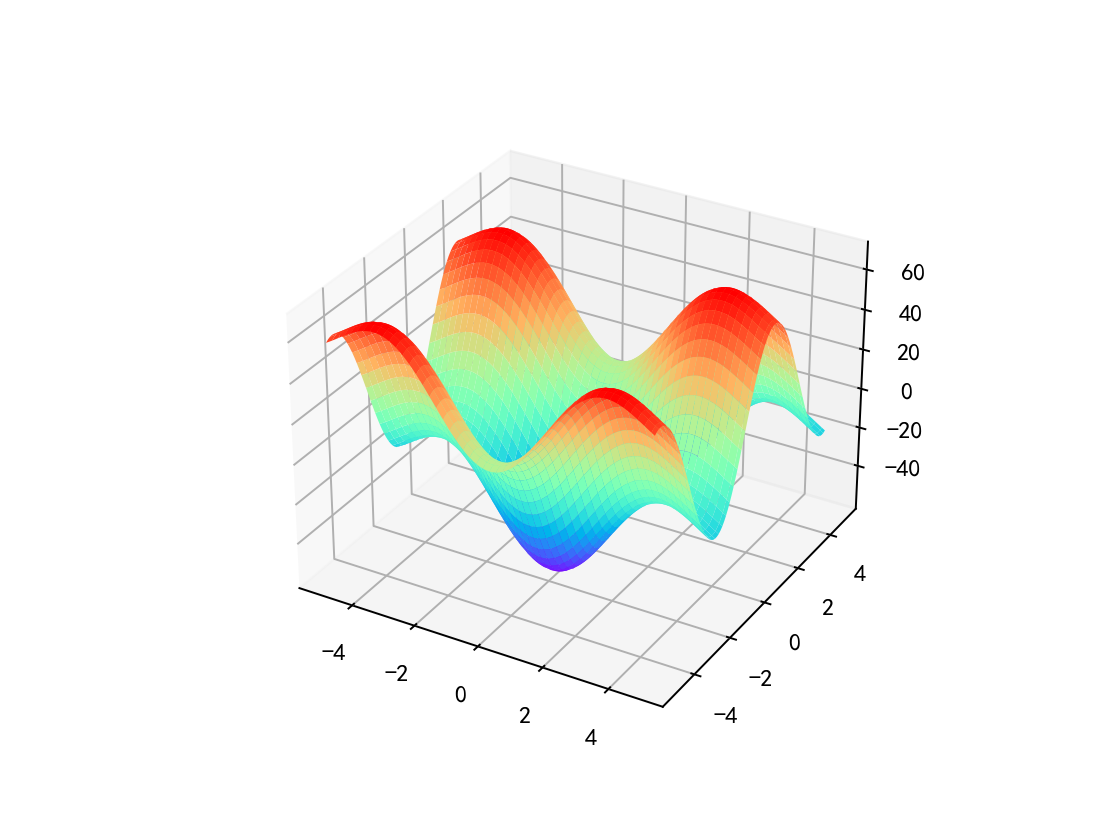

In [43]:
from mpl_toolkits import mplot3d
# 求解 x1**2 + 40*sin(x2) - (1+x2)*(3+x1) 的最小值
def fun2d(x):
    f = x[0]**2 + 40*np.sin(x[1])-20*np.cos(x[0])
    
    return f

minimizer_kwargs = {"method":"SLSQP"}

# 设置迭代最小值
x0=[1.0,1.0]

res = optimize.basinhopping(fun2d, x0, minimizer_kwargs=minimizer_kwargs, niter=200)    

print(res.x)
print(res.fun)


# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)
# compute targets
results = fun2d([x, y])

figure = plt.figure()
axis = plt.axes(projection='3d')
# axis.plot3D(x,y,results,'gray')    #绘制空间曲线
axis.plot_surface(x,y,results,cmap='rainbow')

# plt.scatter(xmin, ymin, s=20, c='r')

plt.show()

<IPython.core.display.Javascript object>


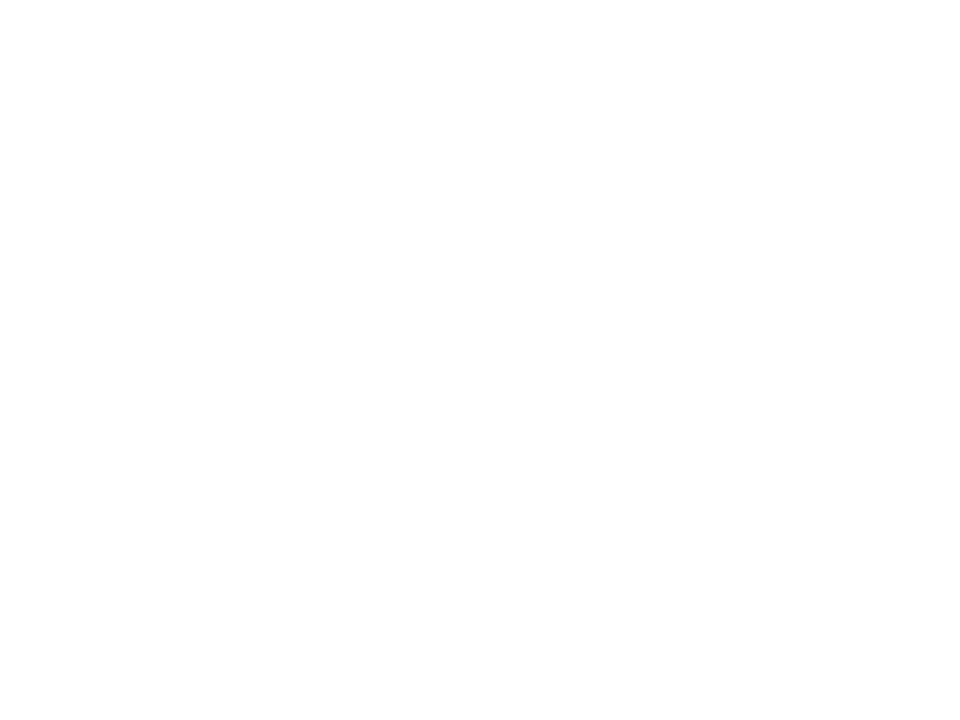

In [36]:
# -*- coding = utf-8 -*-
# PCA降维算法_鸢尾花案例.py
 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
 
iris = load_iris()  # 获取鸢尾花数据集
Y = iris.target  # 数据集标签 ['setosa', 'versicolor', 'virginica']，山鸢尾、变色鸢尾、维吉尼亚鸢尾
X = iris.data  # 数据集特征 四维，花瓣的长度、宽度，花萼的长度、宽度
# Y
# X
# X.shape
# pd.DataFrame(X)
# 调用PCA
pca = PCA(n_components=2)  # 实例化 n_components:降维后需要的维度，即需要保留的特征数量，可视化一般取值2
pca = pca.fit(X)  # 拟合模型
X_dr = pca.transform(X)  # 获取新矩阵
# X_dr
# 也可以fit_transform一步到位
# X_dr = PCA(2).fit_transform(X)
# 要将三种鸢尾花的数据分布显示在二维平面坐标系中，对应的两个坐标（两个特征向量）应该是三种鸢尾花降维后的
# X_dr[Y == 0, 0] #这里是布尔索引，即取出Y=0的行的第0列
 
# 对三种鸢尾花分别绘图
colors = ['red', 'black', 'orange']
# iris.target_names
plt.figure()  # 画布
for i in [0, 1, 2]:
    plt.scatter(X_dr[Y == i, 0]  # x轴
                , X_dr[Y == i, 1]  # y轴
                , alpha=1  # 图表的填充不透明度(0到1之间)
                , c=colors[i]  # 颜色
                , label=iris.target_names[i]  # 标签
                )
plt.legend()  # 显示图例
plt.title('PCA of IRIS dataset')  # 设置标题
plt.show()  # 画图